---
title: "Lecture 00"
date: "now"
format: html
---

In [11]:
#| hidden: true
#| echo: false
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("../style.mplstyle")


Take $X \sim \text{Uniform}(0, 1)$

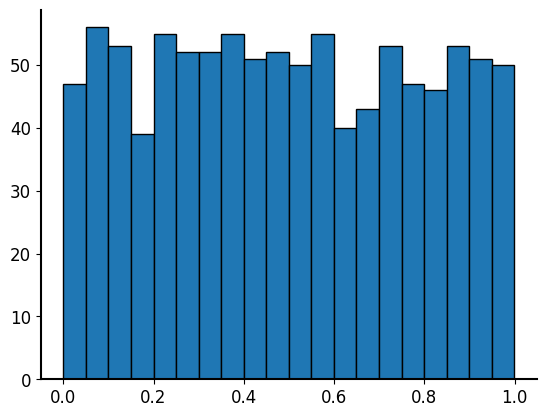

In [12]:
x = np.random.uniform(0, 1, 1000)

plt.hist(x, bins=20, edgecolor="black")
plt.show()